# ДЗ №5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## Задача №1

In [ ]:
mu, var = 0, 1  # теоретические п-ры логнорм распределения
n_samples = 500 # кол-во выборок для проверки
size = 1000     # размер выборок

- __cмоделируем выборку из логнормального распределения $LogNorm(\mu, var)$__ 
- __проверим, что при логарифмировании она становится распределенной в соотв. с $Norm(\mu, var)$__

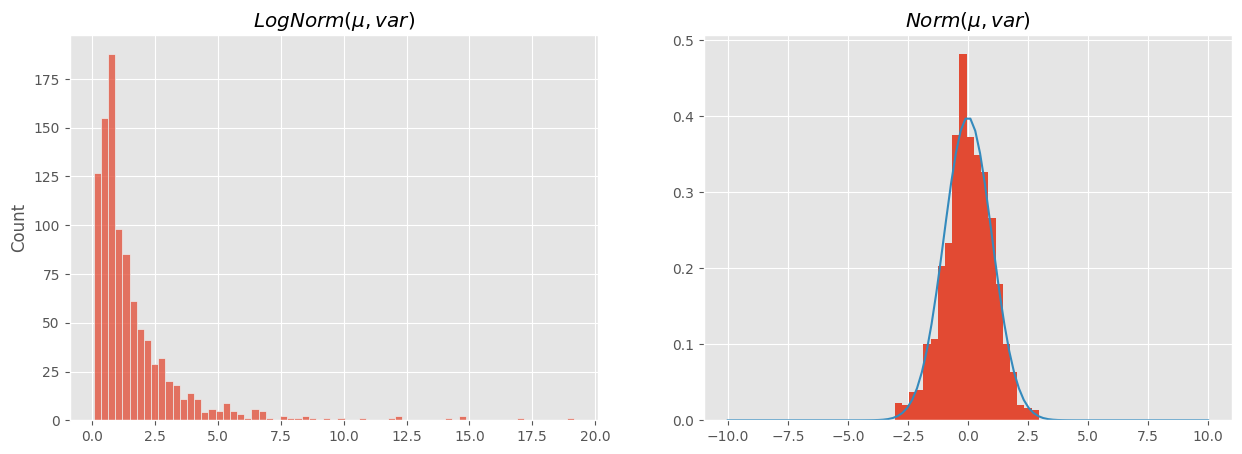

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))

# моделим выборку из X ~ LogN(mu, var) 
input_arr = stats.lognorm.rvs(s=np.sqrt(var), loc=0, scale=np.exp(mu), size=size)

# строим распределение логнорм выборки
sns.histplot(input_arr, ax=axs[0]).set_title('$LogNorm(\mu, var)$')

# логарифмируем выборку
axs[1].hist(np.log(input_arr), density=True, bins=20)

# на этих же осях строим для проверки соотв норм распр-е
x = np.linspace(-10, 10, 100)
pdf = stats.norm(loc=mu, scale=np.sqrt(var)).pdf(x)
axs[1].plot(x, pdf)
axs[1].set_title('$Norm(\mu, var)$')

plt.show()

__Теперь сделаем _ДЗ___

In [ ]:
def estimate_mu(arr):
    ''' Строим выборочную оценку параметра mu.
        В качестве оценки для mu возьмем mean(ln(Xi - 339))'''
    return np.log(arr - 339).mean()

In [ ]:
def lognorm_test(mu, var):
    ''' 
    Функция для моделирования задачи для различных размеров выборок
    1. Генерируем наборы выборок для разного size(10,100,1000).
       Для каждого size берем n_samples выборок по size элементов
    2. Строим статистики для разного size
    3. Считаем MSE для каждого набора выборок
    '''
    mse_arr = []
    for size in [10,100,1000]:
        input_arr = 339 + stats.lognorm.rvs(s=np.sqrt(var), loc=0, scale=np.exp(mu), size=(n_samples, size))
        statistic = np.apply_along_axis(estimate_mu, 1, input_arr)
        mse_arr.append([size, ((statistic - mu)**2).mean()])
    return mse_arr

lognorm_test(0,2)

[[10, 0.2135307548214599],
 [100, 0.018253013648930314],
 [1000, 0.0021766939762490538]]

__Проверим оценку для $\hat{\mu} = \sum_{i} ln(X_{i} - 339)$ на несмещенность__ \
Смоделируем случ.вел и проверим, что $E(\hat{\theta}) = \theta$

In [ ]:
mu, var = 8, 1  # теоретические п-ры логнорм распределения
n_samples = 500 # кол-во выборок для проверки
size = 1000     # размер выборок

In [ ]:
input_arr = 339 + stats.lognorm.rvs(s=np.sqrt(var), loc=0, scale=np.exp(mu), size=(n_samples, size))
statistic = np.apply_along_axis(estimate_mu, 1, input_arr)

<Axes: >

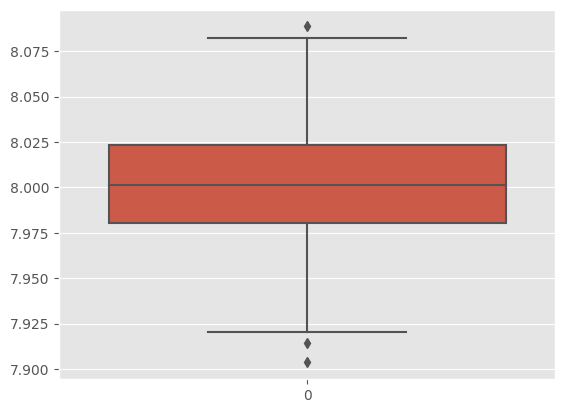

In [ ]:
sns.boxplot(statistic)

__Проверим оценку для $\hat{\mu} = \sum_{i} ln(X_{i} - 339)$ на состоятельность__ \
Смоделируем случ.вел и проверим, что $\hat{\theta} \xrightarrow{p} \theta$

In [ ]:
mu, var = 4.5, 3 # теоретические п-ры логнорм распределения
n_samples = 500 # кол-во выборок для проверки
size = 100      # размер выборок

In [ ]:
ans = []
for n in range(100, 10000): 
    input_arr = 339 + stats.lognorm.rvs(s=np.sqrt(var), loc=0, scale=np.exp(mu), size=n)
    ans.append(estimate_mu(input_arr))


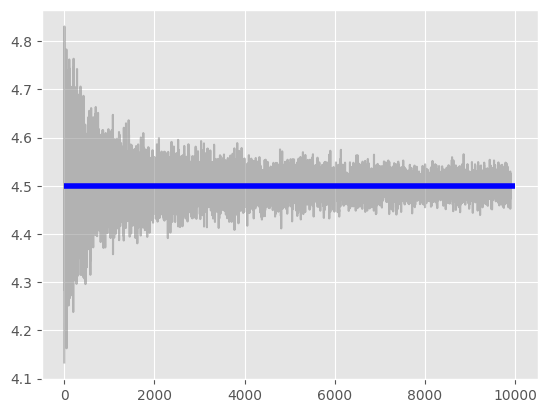

In [ ]:
sns.lineplot(ans, c='grey', alpha = 0.5)
plt.hlines(mu, 0, 10000, color='blue', lw=4, label='реальное значение')